In [2]:
%load_ext autoreload
%autoreload 1

# Clustering

Run this section using ```spherecluster``` env

## Demo

In [2]:
import pickle

start_year = 1950
end_year = 1959
d = 100
w = 10

with open(f'../../data/decades/{start_year}_to_{end_year}/VIDs_{d}feat_{w}context_win_size.pkl', 
          'rb') as f:
        VIDs = pickle.load(f)

with open(f'../../data/decades/{start_year}_to_{end_year}/vectors_{d}feat_{w}context_win_size.pkl', 
            'rb') as f:
        vectors = pickle.load(f)

In [4]:
from spherecluster import VonMisesFisherMixture
K = 26
vmf_hard = VonMisesFisherMixture(n_clusters=K, posterior_type='hard')
vmf_hard.fit(vectors)

/home/lyuzhuoqi/miniconda3/envs/spherecluster/lib/python3.7/site-packages/spherecluster-0.1.7-py3.7.egg/spherecluster/von_mises_fisher_mixture.py:344: RuntimeWarning: invalid value encountered in double_scalars
/home/lyuzhuoqi/miniconda3/envs/spherecluster/lib/python3.7/site-packages/spherecluster-0.1.7-py3.7.egg/spherecluster/von_mises_fisher_mixture.py:288: RuntimeWarning: divide by zero encountered in log


VonMisesFisherMixture(copy_x=True, force_weights=None, init='random-class',
           max_iter=300, n_clusters=26, n_init=10, n_jobs=1,
           normalize=True, posterior_type='hard', random_state=None,
           tol=1e-06, verbose=False)

In [6]:
vmf_hard.labels_

array([24., 24.,  5., ...,  3., 10., 18.])

In [10]:
vmf_hard.cluster_centers_

array([[-0.02536224,  0.05834802,  0.09436964, ..., -0.26021897,
        -0.07516032, -0.0265524 ],
       [ 0.18344244,  0.04394991,  0.0201354 , ..., -0.07530757,
        -0.02505317, -0.06111693],
       [ 0.09488648,  0.03388972,  0.07732126, ..., -0.04086915,
         0.00894189,  0.00271343],
       ...,
       [ 0.05114527, -0.03031565, -0.06258504, ..., -0.13360498,
         0.08040952, -0.00753947],
       [-0.00095778,  0.08270476,  0.14501849, ..., -0.09827794,
        -0.09393919,  0.03311429],
       [ 0.0016818 , -0.03820678,  0.04429099, ..., -0.2287281 ,
         0.00208398, -0.13259435]])

## Loop

In [14]:
import pickle
from spherecluster import VonMisesFisherMixture
d, w = 100, 10
K = 26

for start_year, end_year in zip([1950, 1960, 1970, 1980, 1990, 2000, 2010], 
                                [1959, 1969, 1979, 1989, 1999, 2009, 2021]):
    print(f'working on {start_year}s')
    with open(f'../../data/decades/{start_year}_to_{end_year}/vectors_{d}feat_{w}context_win_size.pkl', 
            'rb') as f:
           vectors = pickle.load(f)
    vmf_hard = VonMisesFisherMixture(n_clusters=K, posterior_type='hard')
    vmf_hard.fit(vectors)
    with open(f'../../data/decades/{start_year}_to_{end_year}/cluster_labels_{d}feat_{w}context_win_size.pkl', 
            'wb') as f:
           pickle.dump(vmf_hard.labels_,f)
    with open(f'../../data/decades/{start_year}_to_{end_year}/cluster_centers_{d}feat_{w}context_win_size.pkl', 
                'wb') as f:
            pickle.dump(vmf_hard.cluster_centers_, f)
    print(f'finish dumping {start_year}s')

working on 1950s


/home/lyuzhuoqi/miniconda3/envs/spherecluster/lib/python3.7/site-packages/spherecluster-0.1.7-py3.7.egg/spherecluster/von_mises_fisher_mixture.py:344: RuntimeWarning: invalid value encountered in double_scalars
/home/lyuzhuoqi/miniconda3/envs/spherecluster/lib/python3.7/site-packages/spherecluster-0.1.7-py3.7.egg/spherecluster/von_mises_fisher_mixture.py:288: RuntimeWarning: divide by zero encountered in log


finish dumping 1950s
working on 1960s
finish dumping 1960s
working on 1970s
finish dumping 1970s
working on 1980s
finish dumping 1980s
working on 1990s
finish dumping 1990s
working on 2000s
finish dumping 2000s
working on 2010s
finish dumping 2010s


# Analysis

Run this section using any env with ```p2v```

## Demo

In [5]:
import sys
sys.path.append('diachronic-p2v')

%aimport p2v
model = p2v.P2V()

data_dir:  /mnt/d/projects/diachronic-p2v/data
2024-11-16 13:01:34 -- start loading Mag_venue_info_df
2024-11-16 13:01:35 -- finish.
2024-11-16 13:01:35 -- start loading labeled_journal_info_df
2024-11-16 13:01:35 -- finish.


In [38]:
import pickle

start_year, end_year = 1950, 1959
d, w = 100, 10

wv = model.load_wv(start_year, end_year, d, w)
all_VIDs = wv.index_to_key
all_vectors = wv.get_normed_vectors()
VIDs_labeled = model.load_VID_labeled(start_year, end_year, d, w)

with open(f'diachronic-p2v/data/decades/{start_year}_to_{end_year}/cluster_labels_{d}feat_{w}context_win_size.pkl', 
        'rb') as f:
        vmf_labels = pickle.load(f)
with open(f'diachronic-p2v/data/decades/{start_year}_to_{end_year}/cluster_centers_{d}feat_{w}context_win_size.pkl', 
        'rb') as f:
        cluster_centers = pickle.load(f)

2024-11-16 13:27:37 -- start loading word vectors...
2024-11-16 13:27:37 -- word vectors loaded, and its shape is: (1645, 100)
2024-11-16 13:27:37 -- start loading VID_labeled...
2024-11-16 13:27:37 -- finish.


In [ ]:
len(all_VIDs)
len(VIDs_labeled['VID'])
len(vmf_labels)

1645

In [ ]:
valid_VID_idx = [all_VIDs.index(vid) for vid in VIDs_labeled['VID']]
len(valid_VID_idx)

1253

In [ ]:
import pandas as pd

cluster_df = pd.DataFrame({'VID': [all_VIDs[idx] for idx in valid_VID_idx], 
                           'Scopus_label': VIDs_labeled['label'],
                           'cluster_label': [vmf_labels[idx] for idx in valid_VID_idx]})

In [32]:
from clusim.clustering import Clustering
import clusim.sim as sim

# Key: row index, val: value of 'area' column
dict_original = {index: [row['Scopus_label']] for index, row in cluster_df.iterrows()}
# Key: row index, val: value of 'cluster_label' column
dict_clustering = {index: [row['cluster_label']] for index, row in cluster_df.iterrows()}

c_original = Clustering(elm2clu_dict = dict_original)
c_clustering = Clustering(elm2clu_dict = dict_clustering)

elementScores, relabeled_elements = sim.element_sim_elscore(c_original, c_clustering, alpha = 0.9)
cluster_df['sim_score'] = elementScores

In [42]:
import numpy as np

vectors = all_vectors[valid_VID_idx]
distances = 1 - np.dot(vectors, cluster_centers.T)
closest_center_distances = np.min(distances, axis=1)
cluster_df['closest_center_distance'] = closest_center_distances


<Axes: xlabel='sim_score', ylabel='Count'>

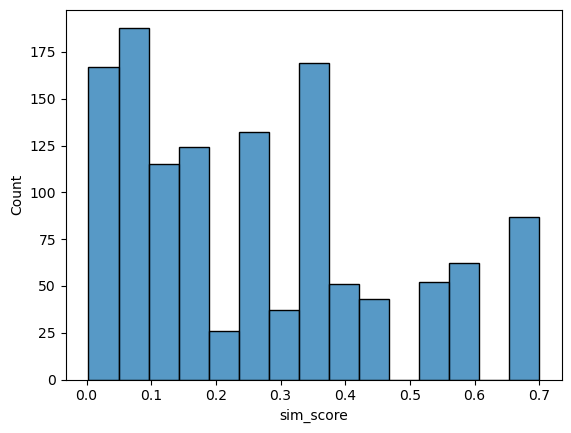

In [45]:
import seaborn as sns

sns.histplot(cluster_df.sim_score)

<Axes: xlabel='closest_center_distance', ylabel='Count'>

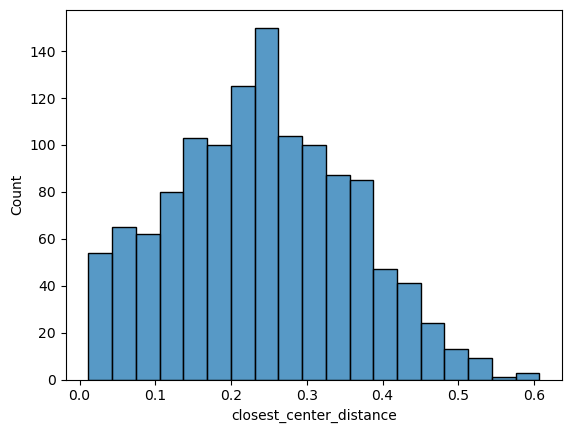

In [46]:
sns.histplot(cluster_df.closest_center_distance)

In [55]:
all_wv_2d = model.load_wv_2d(start_year, end_year, d, w)
wv_2d = pd.DataFrame(all_wv_2d).loc[valid_VID_idx,:]

plot_df = pd.merge(cluster_df, wv_2d, on='VID')

2024-11-16 13:44:59 -- start loading wv_2d...
2024-11-16 13:44:59 -- finish.


In [56]:
plot_df

VID                                  Scopus_label  \
0     1.377736e+08                             Multidisciplinary   
1     1.402520e+08  Biochemistry, Genetics and Molecular Biology   
2     1.111554e+08  Biochemistry, Genetics and Molecular Biology   
3     5.486237e+07                         Physics and Astronomy   
4     3.880285e+06                             Multidisciplinary   
...            ...                                           ...   
1248  1.079145e+08                               Social Sciences   
1249  1.769740e+08                           Arts and Humanities   
1250  2.764621e+09          Agricultural and Biological Sciences   
1251  2.483219e+09          Agricultural and Biological Sciences   
1252  9.874172e+07                           Arts and Humanities   

      cluster_label  sim_score  closest_center_distance      x_val      y_val  
0              18.0   0.065789                 0.422928 -10.123510  -9.442773  
1               5.0   0.185714                 0.253940 -12.032176 -11.015632  
2               5.0   0.185714                 0.248420   0.031881 -28.195047  
3               0.0   0.666667                 0.155218  19.293009 -30.735680  
4              18.0   0.065789                 0.437083  -9.144196  -7.420030  
...             ...        ...                      ...        ...        ...  
1248           12.0   0.186992                 0.073006  20.291378  19.929705  
1249           12.0   0.574074                 0.108681  32.771862  14.552918  
1250            2.0   0.177215                 0.096499 -31.217905 -25.995714  
1251            2.0   0.177215                 0.106651 -30.484240 -26.243330  
1252            1.0   0.083333                 0.175729  19.708525  27.156511  

[1253 rows x 7 columns]

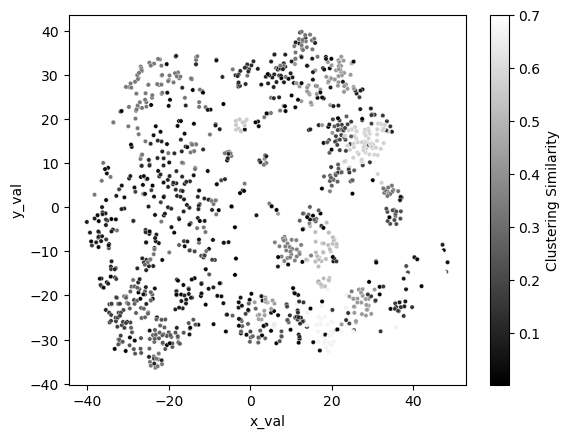

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.gca()
scatter = sns.scatterplot(data=plot_df, x='x_val', y='y_val', 
                          hue='sim_score', palette='gray', s=10,
                          ax=ax, legend=False)
# 添加 color bar
norm = plt.Normalize(plot_df["sim_score"].min(), plot_df["sim_score"].max())  # 归一化颜色范围
sm = plt.cm.ScalarMappable(cmap="gray", norm=norm)  # 定义颜色映射
sm.set_array([plot_df['sim_score']])  # 颜色映射所需的 array
plt.colorbar(sm, label="Clustering Similarity", ax=ax)  # 添加 color bar，并设置标签

## Loop

### Generate and store data

In [80]:
cluster_df_list = []

for start_year, end_year in zip([1950, 1960, 1970, 1980, 1990, 2000, 2010], 
                                [1959, 1969, 1979, 1989, 1999, 2009, 2021]):
        print('------------------------------------')
        print(f'working on {start_year}s')
        wv = model.load_wv(start_year, end_year, d, w)
        all_VIDs = wv.index_to_key
        all_vectors = wv.get_normed_vectors()
        VIDs_labeled = model.load_VID_labeled(start_year, end_year, d, w)
        with open(f'diachronic-p2v/data/decades/{start_year}_to_{end_year}/cluster_labels_{d}feat_{w}context_win_size.pkl', 'rb') as f:
                vmf_labels = pickle.load(f)
        with open(f'diachronic-p2v/data/decades/{start_year}_to_{end_year}/cluster_centers_{d}feat_{w}context_win_size.pkl', 'rb') as f:
                cluster_centers = pickle.load(f)
        valid_VID_idx = [all_VIDs.index(vid) for vid in VIDs_labeled['VID']]
        cluster_df = pd.DataFrame({'VID': [all_VIDs[idx] for idx in valid_VID_idx], 
                                   'Scopus_label': VIDs_labeled['label'],
                                   'cluster_label': [vmf_labels[idx] for idx in valid_VID_idx]})
        print('------------------------------------')
        print('Start clusting ....')
        # Key: row index, val: value of 'area' column
        dict_original = {index: [row['Scopus_label']] for index, row in cluster_df.iterrows()}
        # Key: row index, val: value of 'cluster_label' column
        dict_clustering = {index: [row['cluster_label']] for index, row in cluster_df.iterrows()}

        c_original = Clustering(elm2clu_dict = dict_original)
        c_clustering = Clustering(elm2clu_dict = dict_clustering)

        elementScores, relabeled_elements = sim.element_sim_elscore(c_original, c_clustering, alpha = 0.9)
        cluster_df['sim_score'] = elementScores
        print('------------------------------------')
        print('Start calculating closest center distance ....')
        vectors = all_vectors[valid_VID_idx]
        distances = 1 - np.dot(vectors, cluster_centers.T)
        closest_center_distances = np.min(distances, axis=1)
        cluster_df['closest_center_distance'] = closest_center_distances
        print('------------------------------------')
        print('Start merge 2D projection ....')
        all_wv_2d = model.load_wv_2d(start_year, end_year, d, w)
        wv_2d = pd.DataFrame(all_wv_2d).loc[valid_VID_idx,:]
        plot_df = pd.merge(cluster_df, wv_2d, on='VID')
        print('------------------------------------')
        print('Finsihed')
        cluster_df_list.append(plot_df)

with open(f'diachronic-p2v/figures/vectors/cluter_df.pkl', 'wb') as f:
        pickle.dump(cluster_df_list, f)

------------------------------------
working on 1950s
2024-11-16 14:12:43 -- start loading word vectors...
2024-11-16 14:12:43 -- word vectors loaded, and its shape is: (1645, 100)
2024-11-16 14:12:43 -- start loading VID_labeled...
2024-11-16 14:12:43 -- finish.
------------------------------------
Start clusting ....
------------------------------------
Start calculating closest center distance ....
------------------------------------
Start merge 2D projection ....
2024-11-16 14:12:43 -- start loading wv_2d...
2024-11-16 14:12:43 -- finish.
------------------------------------
Finsihed
------------------------------------
working on 1960s
2024-11-16 14:12:43 -- start loading word vectors...
2024-11-16 14:12:43 -- word vectors loaded, and its shape is: (3116, 100)
2024-11-16 14:12:43 -- start loading VID_labeled...
2024-11-16 14:12:43 -- finish.
------------------------------------
Start clusting ....
------------------------------------
Start calculating closest center distance ....

<Figure size 640x480 with 0 Axes>

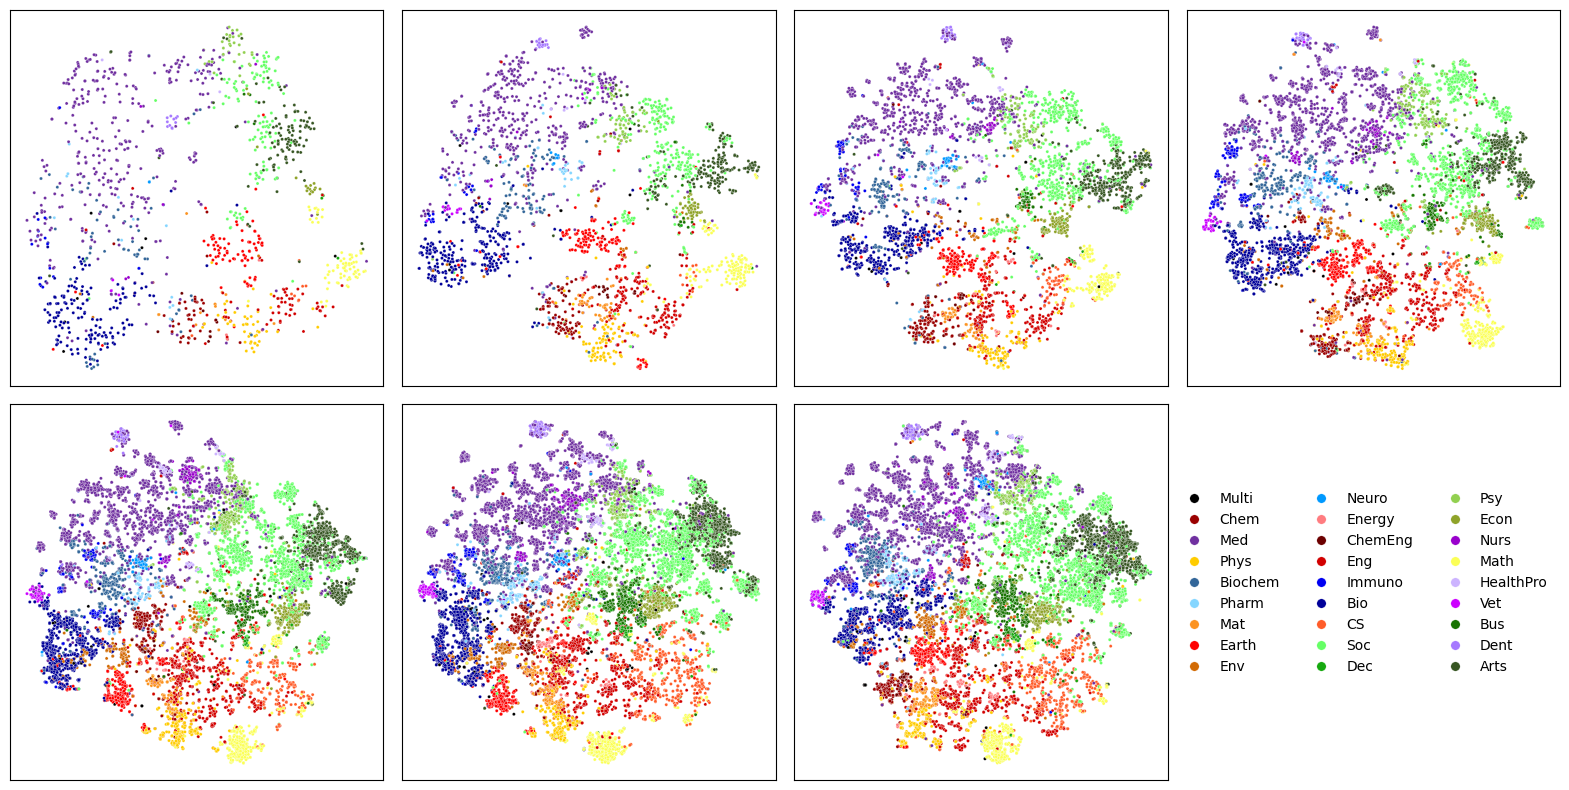

In [123]:
decades = ['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

fig = plt.figure(layout='constrained')
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
plt.subplots_adjust(wspace=0.05, hspace=0.05)
axes = axes.flatten()
for i, cluster_df in enumerate(cluster_df_list):
        ax = axes[i]
        if i in [1, 2, 3]:
                cluster_df['x_val'] = -1 * cluster_df['x_val']
        scatter = sns.scatterplot(data=cluster_df, x='x_val', y='y_val', 
                                  hue='Scopus_label', palette=model.discipline2color, s=5,
                                  ax=ax)
        ax.legend().set_visible(False)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])

axes[-1].axis('off')
# Add legend with labels mapped using model.disc2abbr
handles, labels = scatter.get_legend_handles_labels()
mapped_labels = [model.disc2abbr[label] for label in labels]
ax.legend(handles, mapped_labels,
          bbox_to_anchor=(1., 0.8), loc='upper left', ncol=3, frameon=False, 
          markerscale=3)

(0.0, 1.0, 0.0, 1.0)

<Figure size 640x480 with 0 Axes>

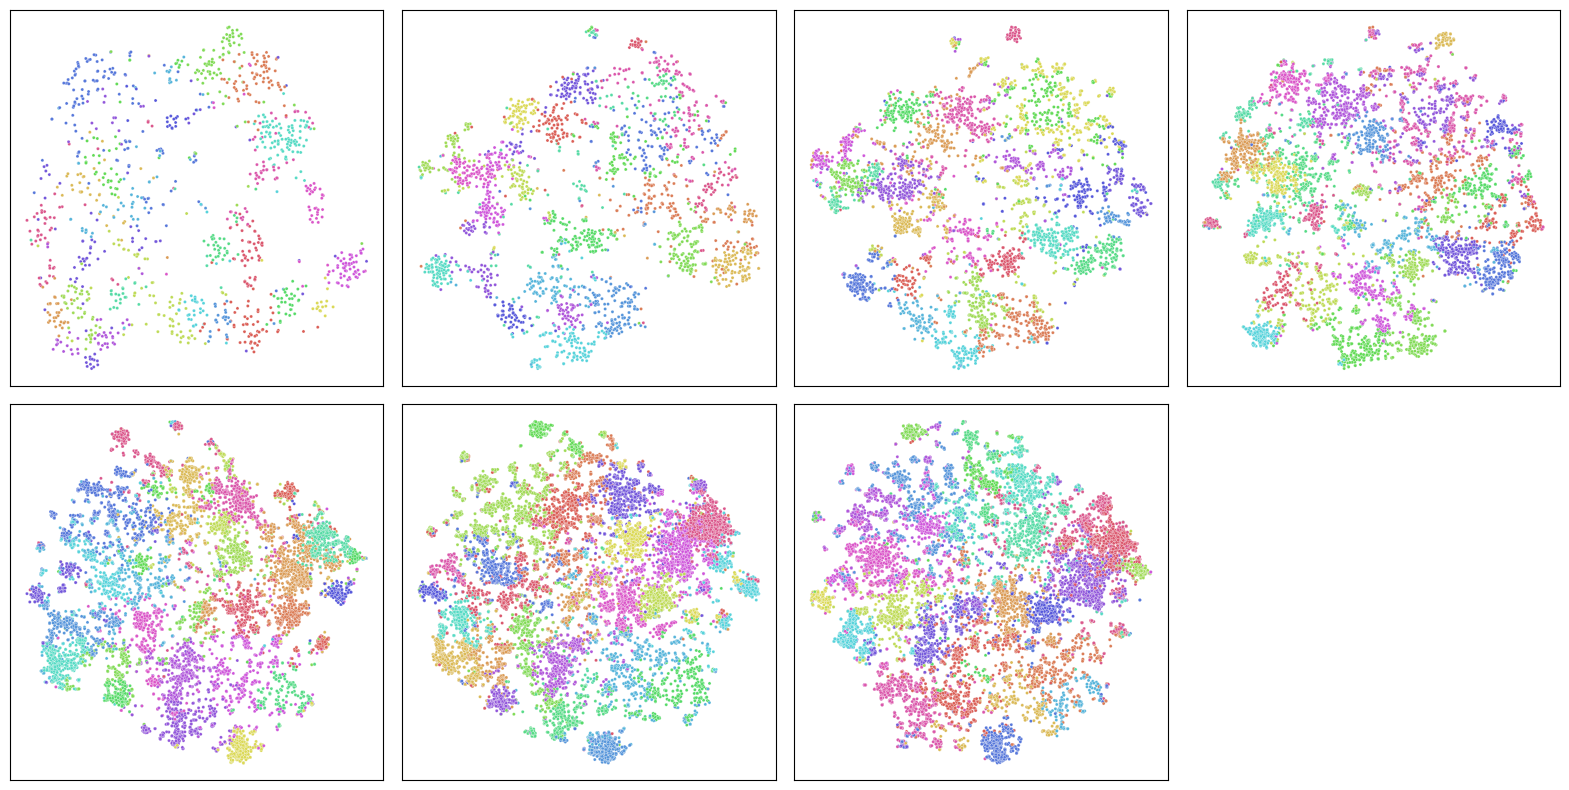

In [ ]:
decades = ['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

fig = plt.figure(layout='constrained')
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
plt.subplots_adjust(wspace=0.05, hspace=0.05)
axes = axes.flatten()
for i, cluster_df in enumerate(cluster_df_list):
        ax = axes[i]
        if i in [1, 2, 3]:
                cluster_df['x_val'] = -1 * cluster_df['x_val']
        scatter = sns.scatterplot(data=cluster_df, x='x_val', y='y_val', 
                                  hue='cluster_label', palette=sns.color_palette("hls", 26), s=5,
                                  ax=ax)
        ax.legend().set_visible(False)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])

axes[-1].axis('off')

In [96]:
# check the min/max values of sim_socre, to determine the color scale
all_sim_score = []
for cluster_df in cluster_df_list:
    print(cluster_df.sim_score.max(), cluster_df.sim_score.min())
    all_sim_score.append(cluster_df_list[0].sim_score.values)

# calculate the mean of the interpolated values, to map the netural value to white
sim_score_mean = np.mean(np.vstack(all_sim_score))
sim_score_mean

0.7 0.002849002849002802
0.9473684210526315 0.0019305019305018156
0.7989949748743719 0.0011235955056179137
0.793969849246231 0.0006954102920722072
0.7699386503067485 0.00043610989969455893
0.7140077821011672 0.00025542784163479215
0.8075370121130552 0.00021579628830370456


0.2582643827080811

Text(0.5, 0.02, 'Clustering Similarity')

<Figure size 640x480 with 0 Axes>

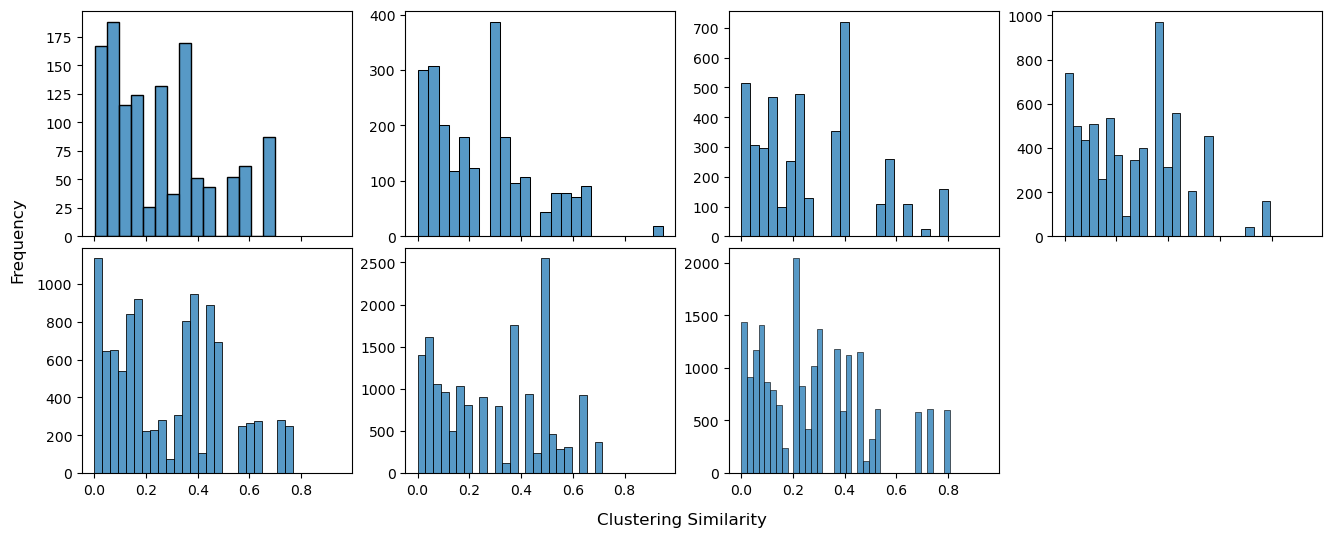

In [149]:
fig = plt.figure(layout='constrained')
fig, axes = plt.subplots(2, 4, figsize=(16, 6), sharex=True)
plt.subplots_adjust(wspace=0.2, hspace=0.05)
axes = axes.flatten()
for i, cluster_df in enumerate(cluster_df_list):
        ax = axes[i]
        sns.histplot(cluster_df.sim_score, ax=ax)
        ax.set_ylabel('')
        ax.set_xlabel('')
axes[-1].axis('off')
fig.supylabel('Frequency', x=0.08, y=0.5)
fig.supxlabel('Clustering Similarity', x=0.5, y=0.02)

Text(0.5, 0.02, 'Cosine distance to the nearest clustering center')

<Figure size 640x480 with 0 Axes>

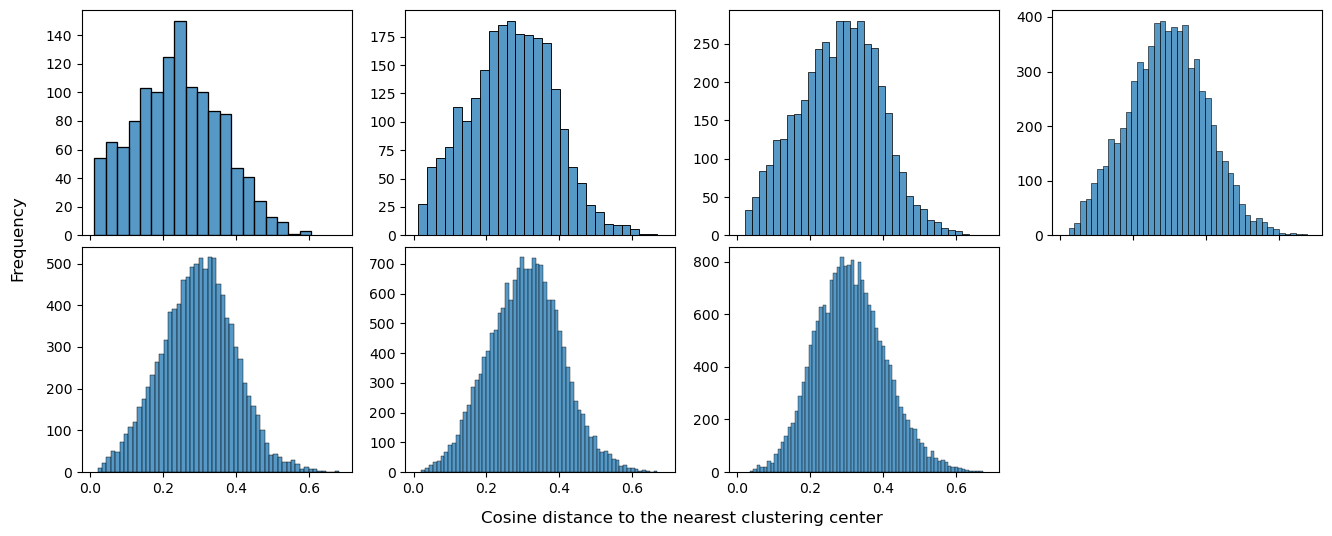

In [151]:
fig = plt.figure(layout='constrained')
fig, axes = plt.subplots(2, 4, figsize=(16, 6), sharex=True)
plt.subplots_adjust(wspace=0.2, hspace=0.05)
axes = axes.flatten()
for i, cluster_df in enumerate(cluster_df_list):
        ax = axes[i]
        sns.histplot(cluster_df.closest_center_distance, ax=ax)
        ax.set_ylabel('')
        ax.set_xlabel('')
axes[-1].axis('off')
fig.supylabel('Frequency', x=0.08, y=0.5)
fig.supxlabel('Cosine distance to the nearest clustering center', x=0.5, y=0.02)

<Figure size 640x480 with 0 Axes>

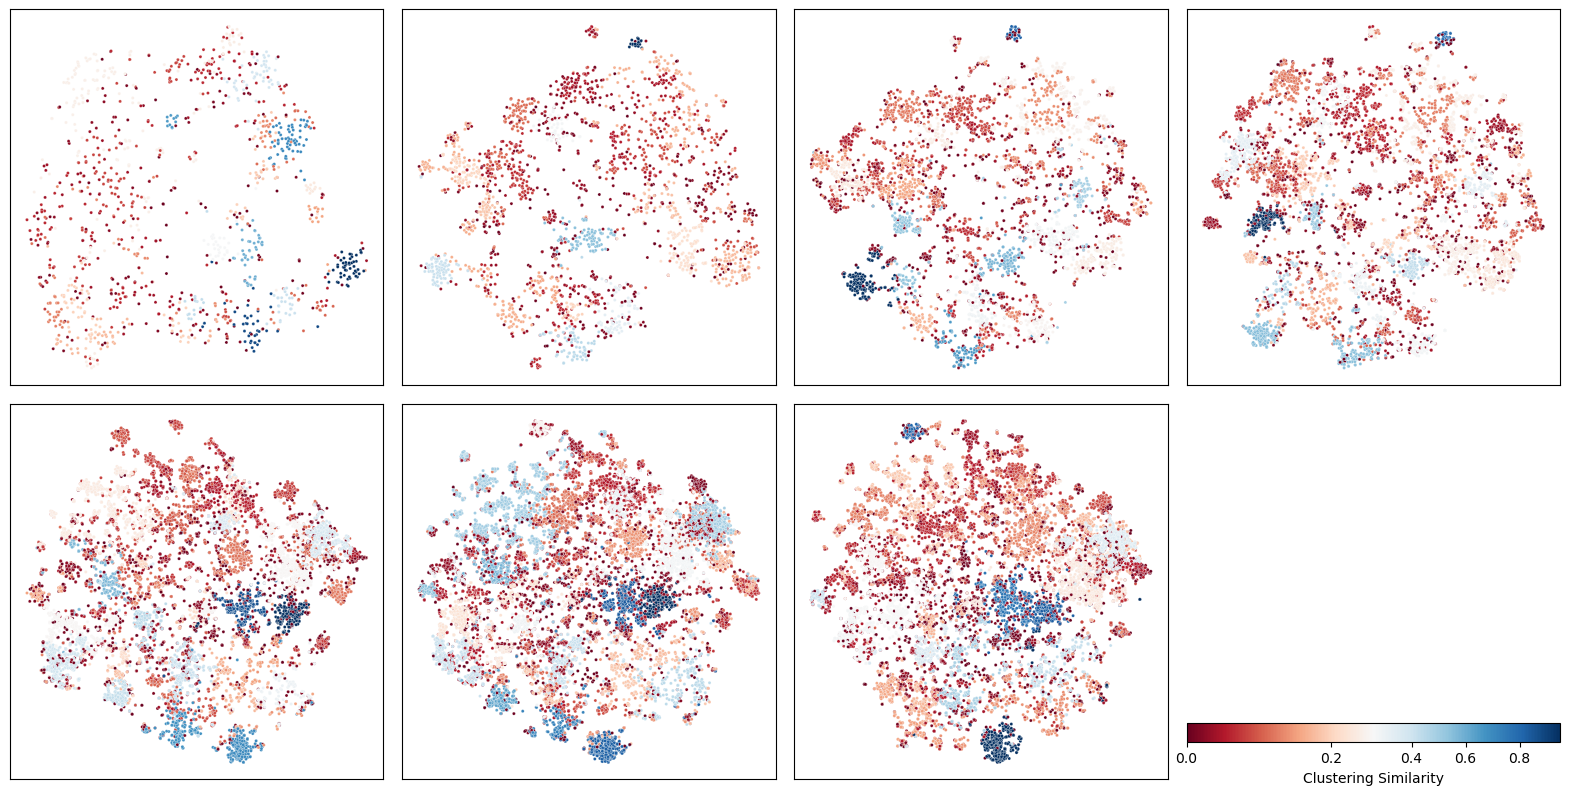

In [166]:
from matplotlib.colors import TwoSlopeNorm
decades = ['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
axes_lim_list = []

cmap = plt.get_cmap('RdBu')
vmin, vmax = 0.0, 0.95
midpoint = sim_score_mean        
# use TwoSlopeNorm to ensure 0 is mapped to the neutral color in the cmap 在 0
norm = TwoSlopeNorm(vcenter=midpoint, vmin=vmin, vmax=vmax)

fig = plt.figure(layout='constrained')
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
plt.subplots_adjust(wspace=0.05, hspace=0.05)
axes = axes.flatten()
for i, cluster_df in enumerate(cluster_df_list):
        ax = axes[i]
        if i in [1, 2, 3]:
                cluster_df['x_val'] = -1 * cluster_df['x_val']
        scatter = sns.scatterplot(data=cluster_df, x='x_val', y='y_val', 
                                  hue='sim_score', palette='RdBu', s=5,
                                  ax=ax, legend=False)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])
        axes_lim_list.append((ax.get_xlim(), ax.get_ylim()))

axes[-1].axis('off')
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])
plt.colorbar(sm, label="Clustering Similarity", ax=axes[-1], orientation='horizontal')

In [ ]:
def make_grid(resolution, xlim, ylim):
    resolution = 128 # grid resolution

    X_vals = np.linspace(xlim[0], xlim[1], resolution)
    Y_vals = np.linspace(ylim[0], ylim[1], resolution)
    X_mesh, Y_mesh = np.meshgrid(X_vals, Y_vals)
    X_mesh = X_mesh.flatten()
    Y_mesh = Y_mesh.flatten()

    print('num of coords:', X_mesh.shape)
    return X_mesh, Y_mesh

def distance_matrix(x0, y0, x1, y1):
    """ 
    Make a distance matrix between pairwise observations.
    Note: from <http://stackoverflow.com/questions/1871536> 
    """
    
    obs = np.vstack((x0, y0)).T
    interp = np.vstack((x1, y1)).T

    d0 = np.subtract.outer(obs[:,0], interp[:,0])
    d1 = np.subtract.outer(obs[:,1], interp[:,1])
    
    # calculate hypotenuse
    return np.hypot(d0, d1)

def simple_idw(x, y, z, xi, yi, power=1):
    """ 
    Simple inverse distance weighted (IDW) interpolation 
    Weights are proportional to the inverse of the distance, so as the distance
    increases, the weights decrease rapidly.
    The rate at which the weights decrease is dependent on the value of power.
    As power increases, the weights for distant points decrease rapidly.
    """
    
    dist = distance_matrix(x,y, xi,yi)
    # In IDW, weights are 1 / distance
    weights = 1.0/(dist+1e-12)**power
    # Make weights sum to one
    weights /= weights.sum(axis=0)

    # Multiply the weights for each interpolated point by all observed Z-values
    return np.dot(weights.T, z)

decades = ['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
z_list = []
pred_z_list = []
mean_z_list = []

for i, cluster_df in enumerate(cluster_df_list):
    print('start processing', decades[i])
    z_list.append(cluster_df['sim_score'])
    mean_z_list.append(cluster_df['sim_score'].mean())
    xlim, ylim = axes_lim_list[i]
    print('xlim:', xlim, 'ylim:', ylim)
    X_mesh, Y_mesh = make_grid(128, xlim, ylim)
    pred_z = simple_idw(cluster_df["x_val"], cluster_df["y_val"], cluster_df["sim_score"], X_mesh, Y_mesh, power=2)
    pred_z_list.append(pred_z)
    print('finish processing', decades[i])

# calculate the mean of the interpolated values, to map the netural value to white
pred_z_mean = np.mean(np.vstack(pred_z_list))
pred_z_mean

start processing 1950s
xlim: (-44.523362159729004, 52.85626697540283) ylim: (-40.21115665435791, 43.59002857208252)
num of coords: (16384,)
finish processing 1950s
start processing 1960s
xlim: (-59.90125617980957, 56.24754676818848) ylim: (-60.24988651275635, 62.75086688995361)
num of coords: (16384,)
finish processing 1960s
start processing 1970s
xlim: (-75.36875534057617, 73.46047592163086) ylim: (-79.06127700805663, 79.54018936157226)
num of coords: (16384,)
finish processing 1970s
start processing 1980s
xlim: (-82.13428535461426, 81.71211280822754) ylim: (-88.44856643676758, 87.72473526000977)
num of coords: (16384,)
finish processing 1980s
start processing 1990s
xlim: (-94.61478424072266, 98.68097686767578) ylim: (-99.7365161895752, 101.13696022033692)
num of coords: (16384,)
finish processing 1990s
start processing 2000s
xlim: (-102.92683258056641, 106.6997055053711) ylim: (-110.45190505981445, 110.5083625793457)
num of coords: (16384,)
finish processing 2000s
start processing 20

0.2710309797025685

num of coords: (16384,)
num of coords: (16384,)
num of coords: (16384,)
num of coords: (16384,)
num of coords: (16384,)
num of coords: (16384,)
num of coords: (16384,)


<Figure size 640x480 with 0 Axes>

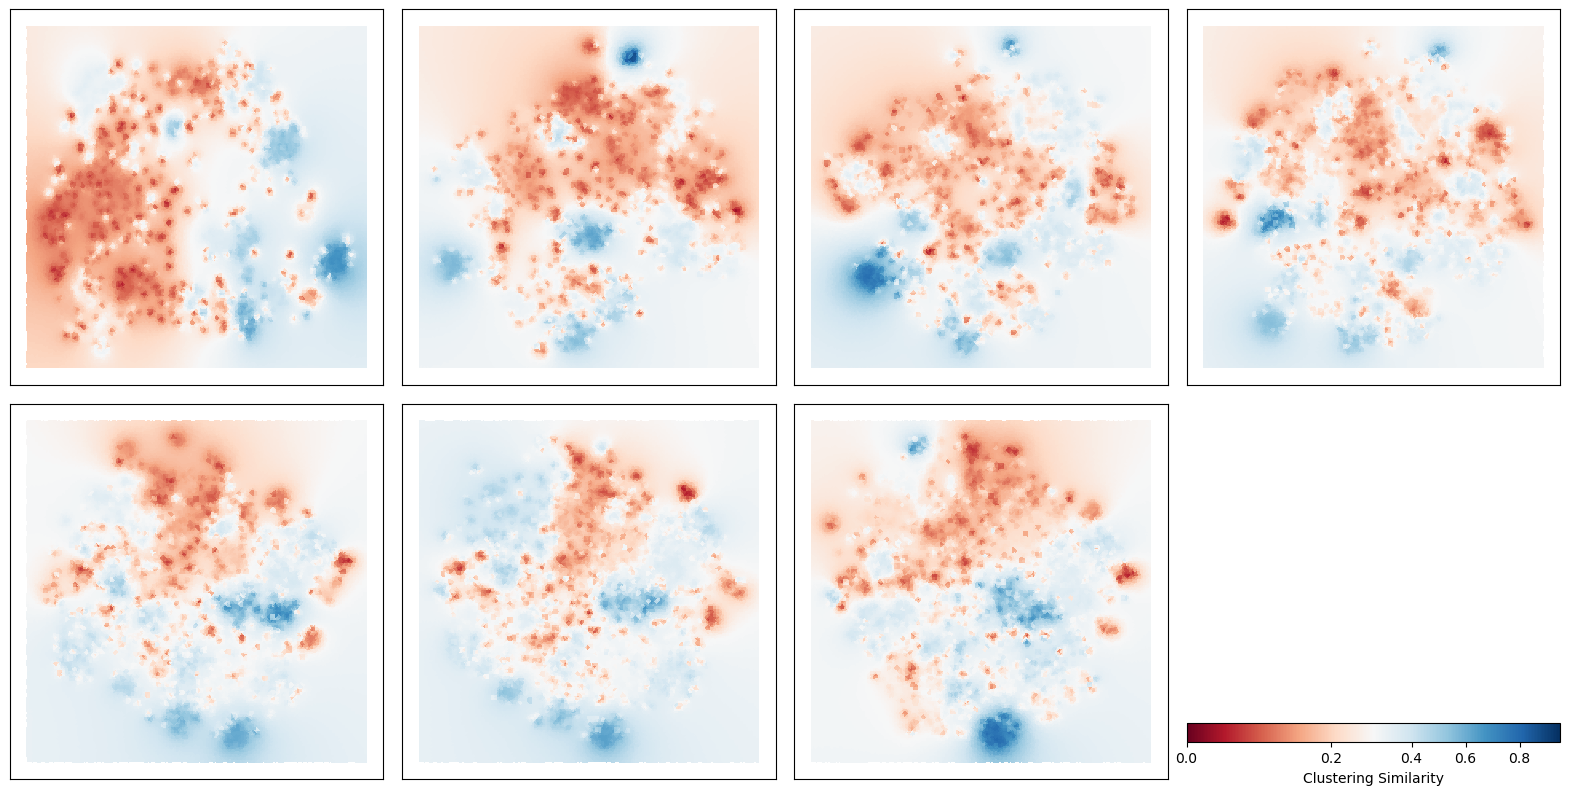

In [193]:
from matplotlib.colors import TwoSlopeNorm
decades = ['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

cmap = plt.get_cmap('RdBu')
vmin, vmax = 0.0, 0.95
midpoint = sim_score_mean        
# use TwoSlopeNorm to ensure 0 is mapped to the neutral color in the cmap 在 0
norm = TwoSlopeNorm(vcenter=midpoint, vmin=vmin, vmax=vmax)

fig = plt.figure(layout='constrained')
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
plt.subplots_adjust(wspace=0.05, hspace=0.05)
axes = axes.flatten()
for i, cluster_df in enumerate(cluster_df_list):
        ax = axes[i]
        if i in [1, 2, 3]:
                cluster_df['x_val'] = -1 * cluster_df['x_val']
        xlim, ylim = axes_lim_list[i]
        X_mesh, Y_mesh = make_grid(128, xlim, ylim)

        cs = ax.tripcolor(X_mesh, Y_mesh, pred_z_list[i], shading='flat', cmap=cmap, norm=norm)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])

axes[-1].axis('off')
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])
plt.colorbar(sm, label="Clustering Similarity", ax=axes[-1], orientation='horizontal')